In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
classmaping = {1:'First Class', 2: 'Second Class', 3:'Third Class'}
df['Class'] = df['Pclass'].map(classmaping)

In [6]:
Survivemaping = {0:'Not Survived', 1: 'Survived'}
df['Survive_Status'] = df['Survived'].map(Survivemaping)

In [8]:
np.all(df.notnull(),axis = 0)

PassengerId        True
Survived           True
Pclass             True
Name               True
Sex                True
Age               False
SibSp              True
Parch              True
Ticket             True
Fare               True
Cabin             False
Embarked          False
Class              True
Survive_Status     True
dtype: bool

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survive_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,Not Survived


In [10]:
df.pivot_table(index = 'Class', columns = 'Survive_Status', values = 'PassengerId', aggfunc = 'count')

Survive_Status,Not Survived,Survived
Class,,
First Class,80,136
Second Class,97,87
Third Class,372,119


In [11]:
df.pivot_table(index = 'Class', columns = 'Sex', values = 'Age', aggfunc = 'mean')

Sex,female,male
Class,,
First Class,34.611765,41.281386
Second Class,28.722973,30.740707
Third Class,21.750000,26.507589


In [12]:
df.pivot_table(index = 'Class', columns = 'Survive_Status', values = ['PassengerId','Age'], aggfunc = {'PassengerId':'count', 'Age': 'mean'})

Age             PassengerId         
Survive_Status Not Survived   Survived Not Survived Survived
Class                                                       
First Class       43.695312  35.368197           80      136
Second Class      33.544444  25.901566           97       87
Third Class       26.555556  20.646118          372      119

In [13]:
df.pivot_table(index = 'Sex', columns = 'Survive_Status', values = 'PassengerId', aggfunc = 'count')

Survive_Status,Not Survived,Survived
Sex,,
female,81,233
male,468,109


In [14]:
df.pivot_table(index = 'Sex', columns = 'Survive_Status', values = 'Age', aggfunc = 'mean')

Survive_Status,Not Survived,Survived
Sex,,
female,25.046875,28.847716
male,31.618056,27.276022


In [16]:
df.pivot_table(index = ['Class', 'Sex'], columns = 'Survive_Status', values = ['PassengerId', 'Age'], aggfunc = {'PassengerId':'count','Age':'mean'})


Age             PassengerId         
Survive_Status      Not Survived   Survived Not Survived Survived
Class        Sex                                                 
First Class  female    25.666667  34.939024            3       91
             male      44.581967  36.248000           77       45
Second Class female    36.000000  28.080882            6       70
             male      33.369048  16.022000           91       17
Third Class  female    23.818182  19.329787           72       72
             male      27.255814  22.274211          300       47

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [20]:
def agebinfunc(x):
    if x <= 20:
        return '0-20'
    elif x <= 40:
        return '21-40'
    elif x <= 60:
        return '41-60'
    elif x <= 80:
        return '61-80'
    else:
        return 'more than 80'
df['Agebin'] = df['Age'].apply(agebinfunc)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survive_Status,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,Not Survived,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,Survived,21-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,Survived,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,Survived,21-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,Not Survived,21-40


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

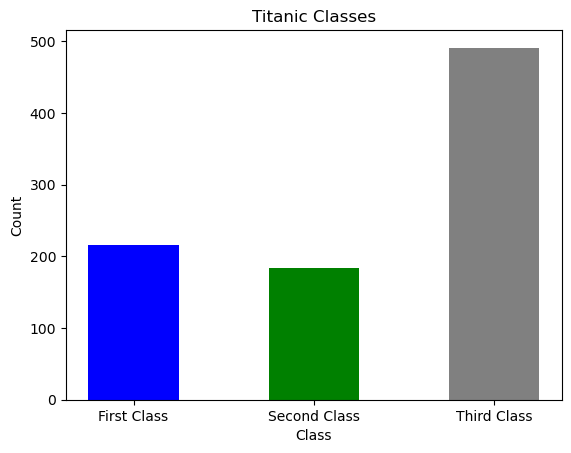

In [22]:
Class_Count = df['Class'].value_counts().reindex(['First Class','Second Class','Third Class'])
plt.bar(Class_Count.index,Class_Count.values,width = 0.5, color = ['blue', 'green', 'gray'])
plt.title('Titanic Classes')
plt.xlabel('Class')
plt.ylabel('Count')
#plt.grid()
plt.show()

Text(0.5, 1.0, 'Titanic Genders on Board')

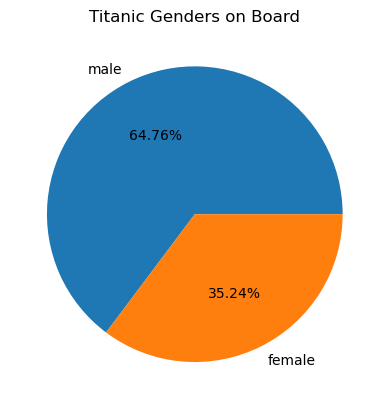

In [23]:
Sex_Count = df['Sex'].value_counts()
plt.pie(Sex_Count.values,labels = Sex_Count.index, rotatelabels = False , autopct='%1.2f%%')
plt.title('Titanic Genders on Board')

<BarContainer object of 4 artists>

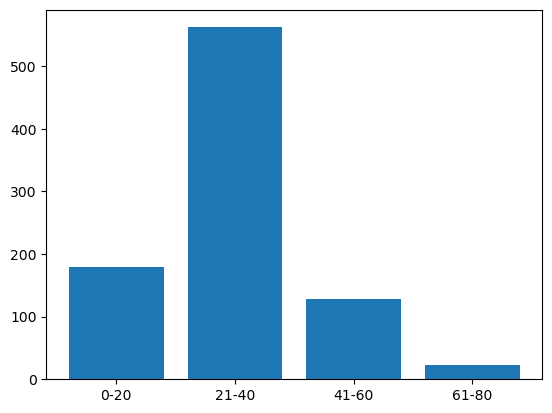

In [24]:
agebincount = df['Agebin'].value_counts().reindex(['0-20','21-40','41-60','61-80'])
plt.bar(agebincount.index,agebincount.values)

In [25]:
import matplotlib.pyplot as plt

In [26]:
import  seaborn as sns

In [27]:
df=df.drop(['Age'], axis=1)
df=df.drop(['Cabin'], axis=1)

In [28]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

SyntaxError: incomplete input (1882248513.py, line 2)

<Axes: xlabel='Survived', ylabel='count'>

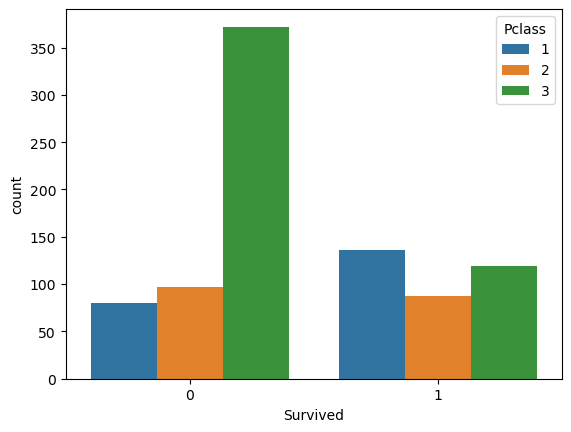

In [32]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])
              

<Axes: xlabel='Survived', ylabel='count'>

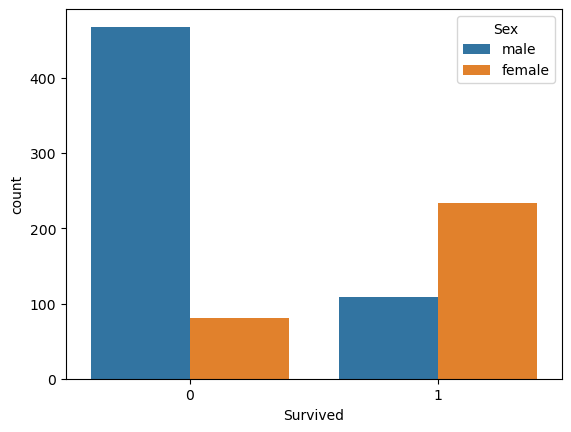

In [33]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

In [35]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Sex']=labelencoder.fit_transform(df['Sex'])

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Class,Survive_Status,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,Third Class,Not Survived,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,First Class,Survived,21-40
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,Third Class,Survived,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,First Class,Survived,21-40
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,Third Class,Not Survived,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,13.0000,S,Second Class,Not Survived,21-40
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,30.0000,S,First Class,Survived,0-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,S,Third Class,Not Survived,21-40
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,30.0000,C,First Class,Survived,21-40


In [38]:
df_final=df
df_final

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Class,Survive_Status,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,Third Class,Not Survived,21-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,First Class,Survived,21-40
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,Third Class,Survived,21-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,First Class,Survived,21-40
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,Third Class,Not Survived,21-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,13.0000,S,Second Class,Not Survived,21-40
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,30.0000,S,First Class,Survived,0-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,S,Third Class,Not Survived,21-40
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,30.0000,C,First Class,Survived,21-40


In [39]:
x_df=df_final[['Pclass','Sex']]
y_df=df_final['Survived']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=0)

In [41]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression(random_state=0)
LogReg.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [42]:
pred = print(LogReg.predict(x_test))


[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [43]:
print(y_test)


495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [2]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression(random_state=0)
LogReg.fit(x_train, y_train)


NameError: name 'LogisticRegression' is not defined

In [3]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression(random_state=0)
LogReg.fit(x_train, y_train)



NameError: name 'x_train' is not defined